# Requirements

In [97]:
!pip install tensorflow keras

In [98]:
import pandas as pd

In [99]:
# Add as many imports as you need.

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for Bitcoin. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- symbol - the resource for prediction
- open - the open price of BTC
- high - the high price of BTC
- low - the low price of BTC
- volumeBTC - the volume of trades BTC
- volumeUSD - the volume of trades USD
- close - the close price of BTC

Target:
close

Load the dataset into a `pandas` data frame.

In [100]:
# Write your code here. Add as many boxes as you need.

# Add as many imports as you need.
# Add as many imports as you need.
import pandas as pd

from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
from VNP.packages.vnp_ez import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Explore the dataset using visualizations of your choice.

In [101]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("../data/BTC-Daily.csv")

In [102]:
df

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,2/28/2022 0:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,2/27/2022 0:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,2/26/2022 0:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,2/25/2022 0:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...
2646,12/2/2014 0:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,12/1/2014 0:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,11/30/2014 0:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,11/29/2014 0:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [103]:
df.isnull().sum()

date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [104]:
df_1 = df.drop(columns="symbol")

In [105]:
df_1

,date,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,2/28/2022 0:00,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,2/27/2022 0:00,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,2/26/2022 0:00,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,2/25/2022 0:00,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...
2646,12/2/2014 0:00,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,12/1/2014 0:00,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,11/30/2014 0:00,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,11/29/2014 0:00,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [106]:
df_1["date"] = pd.to_datetime(df_1["date"])
df_1.set_index(keys=["date"], inplace=True)
df_1.sort_index(inplace=True)

In [107]:
df_1

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2014-11-28,363.59,381.34,360.57,376.28,3.220878e+06,8.617150e+03
2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
...,...,...,...,...,...,...
2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07


<Axes: >

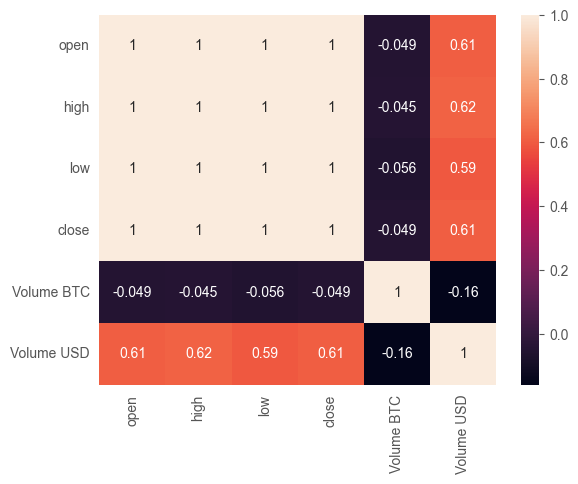

In [108]:
sns.heatmap(df_1.corr(),annot=True)

In [109]:
df_2 = df_1.drop(columns=["open", "high", "low"])

<Axes: >

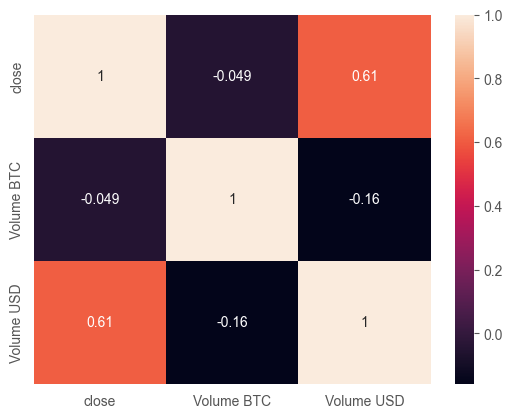

In [110]:
sns.heatmap(df_2.corr(),annot=True)

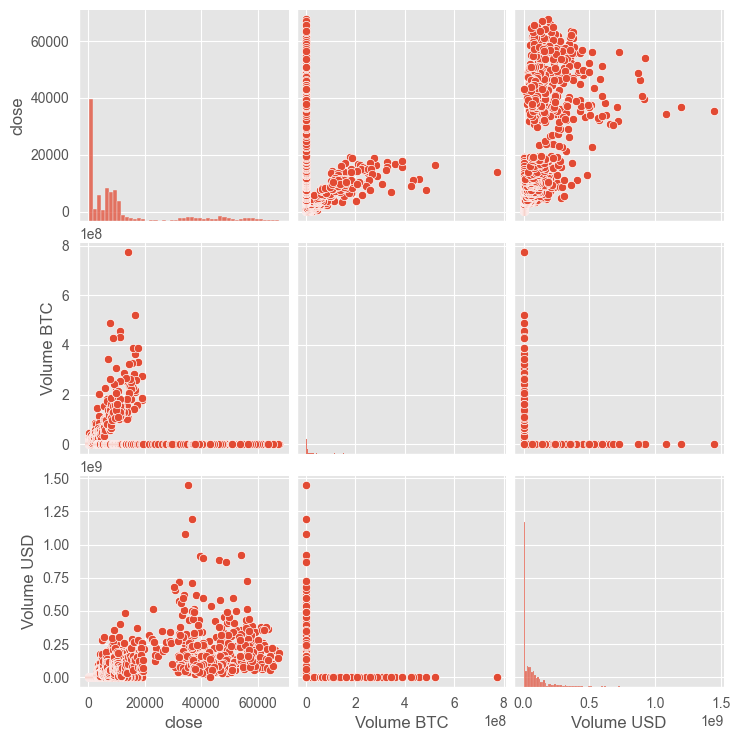

In [111]:
sns.pairplot(df_2)

In [112]:
features = df_2.columns

In [113]:
df_3 = df_2.copy()

In [114]:
lags = range(7, 0, -1)
list(lags)
for lag in lags:
    for column in features:
        df_3[f"{column}_{lag}"] = df_3[column].shift(lag)
df_3

,close,Volume BTC,Volume USD,close_7,Volume BTC_7,Volume USD_7,close_6,Volume BTC_6,Volume USD_6,close_5,...,Volume USD_4,close_3,Volume BTC_3,Volume USD_3,close_2,Volume BTC_2,Volume USD_2,close_1,Volume BTC_1,Volume USD_1
date,,,,,,,,,,,,,,,,,,,,,
2014-11-28,376.28,3.220878e+06,8.617150e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-29,376.72,2.746157e+06,7.245190e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.28,3.220878e+06,8.617150e+03
2014-11-30,373.34,1.145567e+06,3.046330e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,376.28,3.220878e+06,8.617150e+03,376.72,2.746157e+06,7.245190e+03
2014-12-01,378.39,2.520662e+06,6.660560e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,376.28,3.220878e+06,8.617150e+03,376.72,2.746157e+06,7.245190e+03,373.34,1.145567e+06,3.046330e+03
2014-12-02,379.25,2.593576e+06,6.832530e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.617150e+03,376.72,2.746157e+06,7.245190e+03,373.34,1.145567e+06,3.046330e+03,378.39,2.520662e+06,6.660560e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-25,39231.64,2.202852e+03,8.642149e+07,39996.99,2212.714920,8.850194e+07,40109.02,695.654296,2.790201e+07,38373.90,...,1.298208e+08,38269.94,2.388759e+03,9.141766e+07,37274.18,1.778275e+03,6.628375e+07,38376.88,6.302851e+03,2.418838e+08
2022-02-26,39146.66,9.127241e+02,3.573010e+07,40109.02,695.654296,2.790201e+07,38373.90,1283.511547,4.925334e+07,37076.60,...,9.141766e+07,37274.18,1.778275e+03,6.628375e+07,38376.88,6.302851e+03,2.418838e+08,39231.64,2.202852e+03,8.642149e+07
2022-02-27,37712.68,1.701817e+03,6.418008e+07,38373.90,1283.511547,4.925334e+07,37076.60,3501.420364,1.298208e+08,38269.94,...,6.628375e+07,38376.88,6.302851e+03,2.418838e+08,39231.64,2.202852e+03,8.642149e+07,39146.66,9.127241e+02,3.573010e+07


In [115]:
df_4 = df_3.drop(columns= ["Volume BTC", "Volume USD"])

In [116]:
df_4

,close,close_7,Volume BTC_7,Volume USD_7,close_6,Volume BTC_6,Volume USD_6,close_5,Volume BTC_5,Volume USD_5,...,Volume USD_4,close_3,Volume BTC_3,Volume USD_3,close_2,Volume BTC_2,Volume USD_2,close_1,Volume BTC_1,Volume USD_1
date,,,,,,,,,,,,,,,,,,,,,
2014-11-28,376.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-29,376.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.28,3.220878e+06,8.617150e+03
2014-11-30,373.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,376.28,3.220878e+06,8.617150e+03,376.72,2.746157e+06,7.245190e+03
2014-12-01,378.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,376.28,3.220878e+06,8.617150e+03,376.72,2.746157e+06,7.245190e+03,373.34,1.145567e+06,3.046330e+03
2014-12-02,379.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.617150e+03,376.72,2.746157e+06,7.245190e+03,373.34,1.145567e+06,3.046330e+03,378.39,2.520662e+06,6.660560e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-25,39231.64,39996.99,2212.714920,8.850194e+07,40109.02,695.654296,2.790201e+07,38373.90,1283.511547,4.925334e+07,...,1.298208e+08,38269.94,2.388759e+03,9.141766e+07,37274.18,1.778275e+03,6.628375e+07,38376.88,6.302851e+03,2.418838e+08
2022-02-26,39146.66,40109.02,695.654296,2.790201e+07,38373.90,1283.511547,4.925334e+07,37076.60,3501.420364,1.298208e+08,...,9.141766e+07,37274.18,1.778275e+03,6.628375e+07,38376.88,6.302851e+03,2.418838e+08,39231.64,2.202852e+03,8.642149e+07
2022-02-27,37712.68,38373.90,1283.511547,4.925334e+07,37076.60,3501.420364,1.298208e+08,38269.94,2388.759035,9.141766e+07,...,6.628375e+07,38376.88,6.302851e+03,2.418838e+08,39231.64,2.202852e+03,8.642149e+07,39146.66,9.127241e+02,3.573010e+07


In [117]:
df_5 = df_4.dropna()

In [118]:
df_5

,close,close_7,Volume BTC_7,Volume USD_7,close_6,Volume BTC_6,Volume USD_6,close_5,Volume BTC_5,Volume USD_5,...,Volume USD_4,close_3,Volume BTC_3,Volume USD_3,close_2,Volume BTC_2,Volume USD_2,close_1,Volume BTC_1,Volume USD_1
date,,,,,,,,,,,,,,,,,,,,,
2014-12-05,374.95,376.28,3.220878e+06,8.617150e+03,376.72,2.746157e+06,7.245190e+03,373.34,1.145567e+06,3.046330e+03,...,6.660560e+03,379.25,2.593576e+06,6.832530e+03,376.67,2.998358e+06,7.908290e+03,365.20,3.297896e+06,8.865090e+03
2014-12-06,375.07,376.72,2.746157e+06,7.245190e+03,373.34,1.145567e+06,3.046330e+03,378.39,2.520662e+06,6.660560e+03,...,6.832530e+03,376.67,2.998358e+06,7.908290e+03,365.20,3.297896e+06,8.865090e+03,374.95,3.331762e+06,8.951160e+03
2014-12-07,376.87,373.34,1.145567e+06,3.046330e+03,378.39,2.520662e+06,6.660560e+03,379.25,2.593576e+06,6.832530e+03,...,7.908290e+03,365.20,3.297896e+06,8.865090e+03,374.95,3.331762e+06,8.951160e+03,375.07,8.617487e+05,2.300210e+03
2014-12-08,364.61,378.39,2.520662e+06,6.660560e+03,379.25,2.593576e+06,6.832530e+03,376.67,2.998358e+06,7.908290e+03,...,8.865090e+03,374.95,3.331762e+06,8.951160e+03,375.07,8.617487e+05,2.300210e+03,376.87,9.137156e+05,2.429620e+03
2014-12-09,350.49,379.25,2.593576e+06,6.832530e+03,376.67,2.998358e+06,7.908290e+03,365.20,3.297896e+06,8.865090e+03,...,8.951160e+03,375.07,8.617487e+05,2.300210e+03,376.87,9.137156e+05,2.429620e+03,364.61,3.655238e+06,9.920840e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-25,39231.64,39996.99,2.212715e+03,8.850194e+07,40109.02,6.956543e+02,2.790201e+07,38373.90,1.283512e+03,4.925334e+07,...,1.298208e+08,38269.94,2.388759e+03,9.141766e+07,37274.18,1.778275e+03,6.628375e+07,38376.88,6.302851e+03,2.418838e+08
2022-02-26,39146.66,40109.02,6.956543e+02,2.790201e+07,38373.90,1.283512e+03,4.925334e+07,37076.60,3.501420e+03,1.298208e+08,...,9.141766e+07,37274.18,1.778275e+03,6.628375e+07,38376.88,6.302851e+03,2.418838e+08,39231.64,2.202852e+03,8.642149e+07
2022-02-27,37712.68,38373.90,1.283512e+03,4.925334e+07,37076.60,3.501420e+03,1.298208e+08,38269.94,2.388759e+03,9.141766e+07,...,6.628375e+07,38376.88,6.302851e+03,2.418838e+08,39231.64,2.202852e+03,8.642149e+07,39146.66,9.127241e+02,3.573010e+07


# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [119]:
# Write your code here. Add as many boxes as you need.

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [120]:
# Write your code here. Add as many boxes as you need.
x,y = get_x_and_y(df_5, "close")

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [122]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [123]:
y_scaled = MinMaxScaler()

In [124]:
y_train_scaled = y_scaled.fit_transform(y_train.to_numpy().reshape(-1, 1))


In [125]:
lag = 7

In [126]:
x_train_scaled_shaped = x_train_scaled.reshape(x_train_scaled.shape[0], lag, (x_train_scaled.shape[1] // lag))
x_test_scaled_shaped = x_test_scaled.reshape(x_test_scaled.shape[0], lag, (x_test_scaled.shape[1] // lag))

In [127]:
x_train_scaled_shaped.shape

(2115, 7, 3)

In [128]:
from keras.api.models import Sequential
from keras.api.layers import Input, LSTM, Dense

In [144]:
import tensorflow as tf
import numpy as np
import random

In [145]:
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [175]:
model = Sequential([
    Input((x_train_scaled_shaped.shape[1], x_train_scaled_shaped.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu", return_sequences=True),
    LSTM(16, activation="relu", return_sequences=True),
    LSTM(8, activation="relu", return_sequences=False),
    # LSTM(16, activation="relu", return_sequences=False),
    Dense(1, activation="linear")
])

In [176]:
model.summary()
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                  │ (None, 7, 64)          │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 7, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ (None, 7, 16)          │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,769 (131.91 KB)

 Trainable params: 33,769 (131.91 KB)

 Non-trainable params: 0 (0.00 B)

In [177]:
history = model.fit(x_train_scaled_shaped, y_train_scaled, validation_split=0.2, epochs=16, batch_size=32, shuffle=False)

Epoch 1/16
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0791 - val_mean_squared_error: 0.0791
Epoch 2/16
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 3/16
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 4/16
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0956 - val_mean_squared_error: 0.0956
Epoch 5/16
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0671 - val_mean_squared_error: 0.0671
Epoch 6/16
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 7/16
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1000 - va

<Axes: >

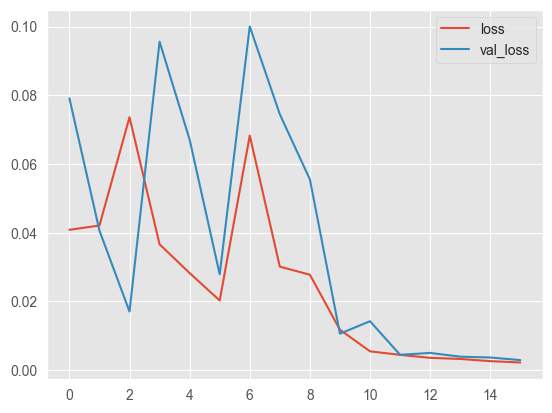

In [178]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")


In [179]:
pred_y = model.predict(x_test_scaled_shaped)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [180]:
pred_y_scaled = y_scaled.inverse_transform(pred_y)
r2_score(y_test, pred_y_scaled)

-6.120985267402717

## Neural Networks

Create an LSTM model and train it using the `train` function.

In [135]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [136]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [137]:
# Write your code here. Add as many boxes as you need.

# Additional Bonus Task

Group the data by month. You can use [pandas.Grouper](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) function.

In [182]:
df_grouped = df_1.groupby(pd.Grouper(freq="1M")).mean()
df_grouped

C:\Users\User-PC\AppData\Local\Temp\ipykernel_19280\257662279.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df_1.groupby(pd.Grouper(freq="1M")).mean()


,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2014-11-30,372.193333,383.310000,368.713333,375.446667,2.370867e+06,6.302890e+03
2014-12-31,343.688387,348.636452,336.454194,341.813548,2.890151e+06,8.538790e+03
2015-01-31,250.943226,260.632903,238.363871,247.703871,5.431845e+06,2.355429e+04
2015-02-28,233.012500,239.859643,226.930357,234.278214,1.906693e+06,8.128419e+03
2015-03-31,268.984516,274.261613,261.617419,268.596774,2.456041e+06,9.173154e+03
...,...,...,...,...,...,...
2021-11-30,60847.510000,62106.503000,59143.207000,60705.494000,2.406693e+03,1.447363e+08
2021-12-31,49673.636129,50794.813226,47969.005484,49328.349032,2.319238e+03,1.147267e+08
2022-01-31,41351.752903,42166.822258,40007.854516,41111.849677,2.318621e+03,9.244537e+07


In [184]:
df_grouped_1 , features = auto_shift(df_grouped, lag, features, auto_drop_na=True, return_features=True)

In [186]:
features

['open',
 'high',
 'low',
 'close_prev_7',
 'close_prev_6',
 'close_prev_5',
 'close_prev_4',
 'close_prev_3',
 'close_prev_2',
 'close_prev_1',
 'Volume BTC_prev_7',
 'Volume BTC_prev_6',
 'Volume BTC_prev_5',
 'Volume BTC_prev_4',
 'Volume BTC_prev_3',
 'Volume BTC_prev_2',
 'Volume BTC_prev_1',
 'Volume USD_prev_7',
 'Volume USD_prev_6',
 'Volume USD_prev_5',
 'Volume USD_prev_4',
 'Volume USD_prev_3',
 'Volume USD_prev_2',
 'Volume USD_prev_1']

In [190]:
df_grouped_2 = df_grouped_1.drop(columns = ["open", "high", "low", "Volume USD", "Volume BTC"])

In [191]:
df_grouped_2

,close,close_prev_7,close_prev_6,close_prev_5,close_prev_4,close_prev_3,close_prev_2,close_prev_1,Volume BTC_prev_7,Volume BTC_prev_6,...,Volume BTC_prev_3,Volume BTC_prev_2,Volume BTC_prev_1,Volume USD_prev_7,Volume USD_prev_6,Volume USD_prev_5,Volume USD_prev_4,Volume USD_prev_3,Volume USD_prev_2,Volume USD_prev_1
date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,237.388667,375.446667,341.813548,247.703871,234.278214,268.596774,234.833333,236.153548,2.370867e+06,2.890151e+06,...,2.456041e+06,1.957545e+06,1.402679e+06,6.302890e+03,8.538790e+03,2.355429e+04,8.128419e+03,9.173154e+03,8.416993e+03,5.933034e+03
2015-07-31,279.595484,341.813548,247.703871,234.278214,268.596774,234.833333,236.153548,237.388667,2.890151e+06,5.431845e+06,...,1.957545e+06,1.402679e+06,1.854247e+06,8.538790e+03,2.355429e+04,8.128419e+03,9.173154e+03,8.416993e+03,5.933034e+03,7.730591e+03
2015-08-31,251.933226,247.703871,234.278214,268.596774,234.833333,236.153548,237.388667,279.595484,5.431845e+06,1.906693e+06,...,1.402679e+06,1.854247e+06,3.533811e+06,2.355429e+04,8.128419e+03,9.173154e+03,8.416993e+03,5.933034e+03,7.730591e+03,1.260323e+04
2015-09-30,233.346333,234.278214,268.596774,234.833333,236.153548,237.388667,279.595484,251.933226,1.906693e+06,2.456041e+06,...,1.854247e+06,3.533811e+06,3.098454e+06,8.128419e+03,9.173154e+03,8.416993e+03,5.933034e+03,7.730591e+03,1.260323e+04,1.292393e+04
2015-10-31,265.234194,268.596774,234.833333,236.153548,237.388667,279.595484,251.933226,233.346333,2.456041e+06,1.957545e+06,...,3.533811e+06,3.098454e+06,4.342468e+06,9.173154e+03,8.416993e+03,5.933034e+03,7.730591e+03,1.260323e+04,1.292393e+04,1.857822e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,60705.494000,57098.524000,46456.518387,35843.433667,34449.033226,45705.102903,45947.265333,57917.162581,4.654120e+03,6.766189e+03,...,2.599877e+03,2.328079e+03,2.554336e+03,2.630359e+08,2.949962e+08,1.710701e+08,9.029344e+07,1.169816e+08,1.055430e+08,1.490666e+08
2021-12-31,49328.349032,46456.518387,35843.433667,34449.033226,45705.102903,45947.265333,57917.162581,60705.494000,6.766189e+03,4.807447e+03,...,2.328079e+03,2.554336e+03,2.406693e+03,2.949962e+08,1.710701e+08,9.029344e+07,1.169816e+08,1.055430e+08,1.490666e+08,1.447363e+08
2022-01-31,41111.849677,35843.433667,34449.033226,45705.102903,45947.265333,57917.162581,60705.494000,49328.349032,4.807447e+03,2.579614e+03,...,2.554336e+03,2.406693e+03,2.319238e+03,1.710701e+08,9.029344e+07,1.169816e+08,1.055430e+08,1.490666e+08,1.447363e+08,1.147267e+08


In [192]:
x_1, y_1 = get_x_and_y(df_grouped_2, "close")

In [193]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.2, shuffle=False)

In [194]:
scaler = MinMaxScaler()
x_train_scaled_1 = scaler.fit_transform(x_train_1)
x_test_scaled_1 = scaler.transform(x_test_1)

In [195]:
y_scaled_1 = MinMaxScaler()
y_train_scaled_1 = y_scaled_1.fit_transform(y_train_1.to_numpy().reshape(-1, 1))

In [196]:

lag = 7
x_train_scaled_shaped_1 = x_train_scaled_1.reshape(x_train_scaled_1.shape[0], lag, (x_train_scaled_1.shape[1] // lag))
x_test_scaled_shaped_1 = x_test_scaled_1.reshape(x_test_scaled_1.shape[0], lag, (x_test_scaled_1.shape[1] // lag))
x_train_scaled_shaped_1.shape

(65, 7, 3)

In [245]:
model_1 = Sequential([
    Input((x_train_scaled_shaped_1.shape[1], x_train_scaled_shaped_1.shape[2],)),
    LSTM(4, activation="relu", return_sequences=True),
    # LSTM(32, activation="relu", return_sequences=True),
    # LSTM(16, activation="relu", return_sequences=True),
    LSTM(2, activation="relu", return_sequences=False),
    # LSTM(16, activation="relu", return_sequences=False),
    Dense(1, activation="linear")
])

In [246]:
model_1.summary()
model_1.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_66 (LSTM)                  │ (None, 7, 4)           │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_67 (LSTM)                  │ (None, 2)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187 (748.00 B)

 Trainable params: 187 (748.00 B)

 Non-trainable params: 0 (0.00 B)

In [247]:
history = model_1.fit(x_train_scaled_shaped_1, y_train_scaled_1, validation_split=0.1, epochs=16, batch_size=65,
                    shuffle=False)

Epoch 1/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.2660 - mean_squared_error: 0.2660 - val_loss: 0.7154 - val_mean_squared_error: 0.7154
Epoch 2/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.7012 - val_mean_squared_error: 0.7012
Epoch 3/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.2536 - mean_squared_error: 0.2536 - val_loss: 0.6873 - val_mean_squared_error: 0.6873
Epoch 4/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.2477 - mean_squared_error: 0.2477 - val_loss: 0.6738 - val_mean_squared_error: 0.6738
Epoch 5/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 0.2420 - mean_squared_error: 0.2420 - val_loss: 0.6608 - val_mean_squared_error: 0.6608
Epoch 6/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.2364 - mean_squared_error: 0.2364 - val_loss: 0.6480 - val_mean_squared_error: 0.6480
Epoch 7/16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.2311 - mean_squared_error: 0.2311 - val_loss: 0.6357 - val_mean_squ

<Axes: >

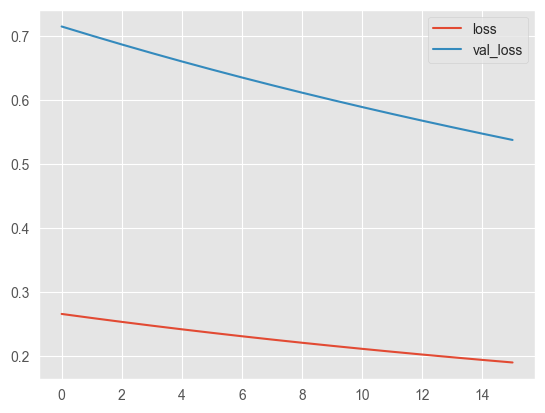

In [248]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [249]:
pred_y_1 = model_1.predict(x_test_scaled_shaped_1)
pred_y_scaled_1 = y_scaled.inverse_transform(pred_y_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


In [243]:
r2_score(y_test_1, pred_y_scaled_1)

-10.299831797258895

Create an LSTM model to predict the 'close' price on a montly frequency.